# VAE/GAN Example
(Code and notebook by [TJ Torres](https://twitter.com/Teejosaur), Data Scientist in Data Labs @ [StitchFix](http://multithreaded.stitchfix.com/blog/))
## Introduction
This notebook should serve as a brief example showing you how to use the functionality of fauxtograph to simply train a VAE/GAN model on the CLI downloadable hubble image set.

Keep in mind that the performance of the model here represents a low number of training epochs and does not accurately reflect the full potential of the model.

All the code for this can be found on the GitHub [fauxtograph repo](https://github.com/stitchfix/fauxtograph)


## Setup

To get setup you'll want to first install the latest version of fauxtograph with
```bash
pip install fauxtograph
```
Or if you have a previous version installed add the upgrade flag as in
```bash
pip install --upgrade fauxtograph
```
With fauxtograph installed you just need to import the model class you'd like (I am importing all three here to show what's availble be we will only use the `VAEGAN` class) as well as `get_paths` and `image_resize` functions. We'll aslop setup the standard inline plotting with `matplotlib`.

In [1]:
from fauxtograph import VAE, GAN, VAEGAN, get_paths, image_resize
import matplotlib.pyplot as plt
%matplotlib inline

## Resizing Images

Since we will be using convolution, and do to the abiguities in upsampling wiht convoluton, the images must be of specific fixed sizes that are determined by the convolution architecture. You can check the next lower allowable size by running:
```python
from fauxtograph import calc_fc_size, calc_im_size

desired_width, desired_height = 100, 100
convolved_shape = calc_fc_size(100, 100)
resize_shape = calc_im_size(*convolved_shape[1:])
print resize_shape
```
You'll see that we need to resize our images to 96x96.

Next we will get the image paths, then run them through the resizer and regrab those resized paths.

In [2]:
paths = get_paths('/home/ubuntu/Data/hubble/')

In [3]:
image_resize(paths, '/home/ubuntu/Data/hubble_resized/', 96, 96)

In [4]:
paths = get_paths('/home/ubuntu/Data/hubble_resized/')

## Instantiate and Train the Model

Next we will want to train the model. Let's instantiate it and then use it to load the properly sized images into the variable `x_all`.

In [5]:
vg = VAEGAN(img_width=96, img_height=96)
x_all = vg.load_images(paths)

Image Files Loaded!


## Training the VAE/GAN

Now we will just train the model using the `fit` method. The options below will save the model and optimizer states  as well as some reconstructed/generated images from the model every 2 epochs to the given folders. It'll also print out diagnostics on training losses every epoch and show images generated/reconstructed using the current model state ever `pic_freq` number of batches. Moreover, the mirroring option randomly mirrors the images along the vertical axis with 50% probability to artificially increase our image set variance. Finally, if you don't have a GPU it'll be best to add the `flag_gpu=False` option. 

**NOTE:** Be patient with these types of models, they often have somewhat oscillatory behavior at times. Just wait for it to either calm down or make sure you're saving the model state frequently enogh to go back to a former state and retrain.  

epoch: 1
|######----| 29/42  69% [elapsed: 00:30 left: 00:13,  0.96 iters/sec]

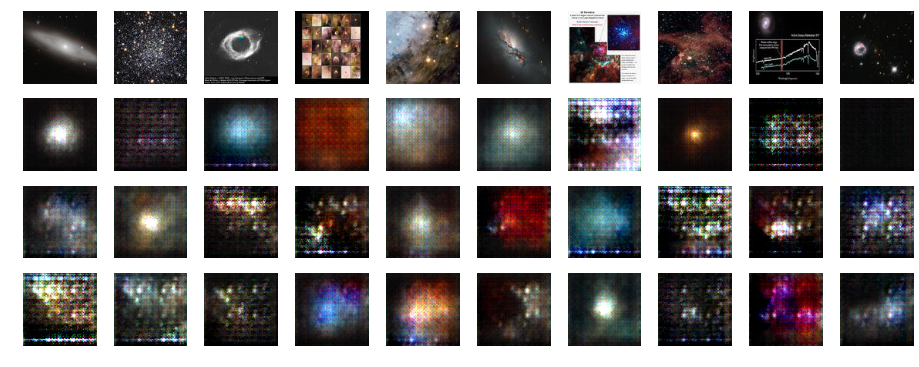

enc_loss = 0.88507270813, dec_loss = 0.227999567986 , disc_loss = 0.560801744461
gan_loss = 0.560801744461, sim_loss = 0.788801372051, kl_loss = 0.0962714105844
time: 48.179364


epoch: 2
|######----| 29/42  69% [elapsed: 00:30 left: 00:13,  0.96 iters/sec]

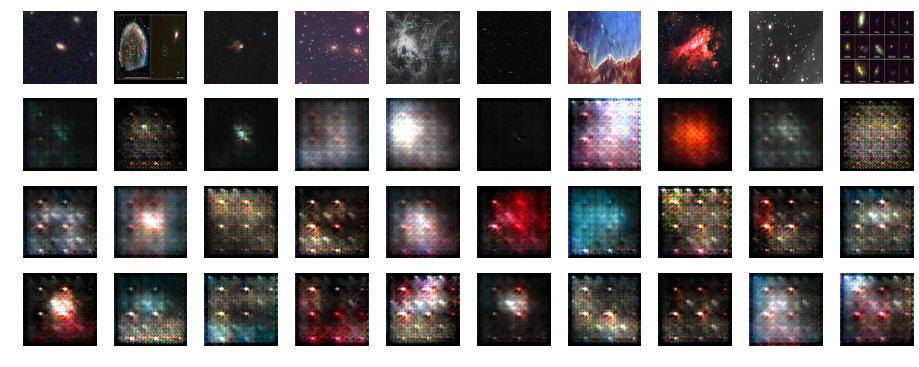

enc_loss = 0.914558053017, dec_loss = 0.218635514379 , disc_loss = 0.596742153168
gan_loss = 0.596742153168, sim_loss = 0.815377533436, kl_loss = 0.099180392921
time: 57.283233


epoch: 3
|######----| 29/42  69% [elapsed: 00:30 left: 00:13,  0.96 iters/sec]

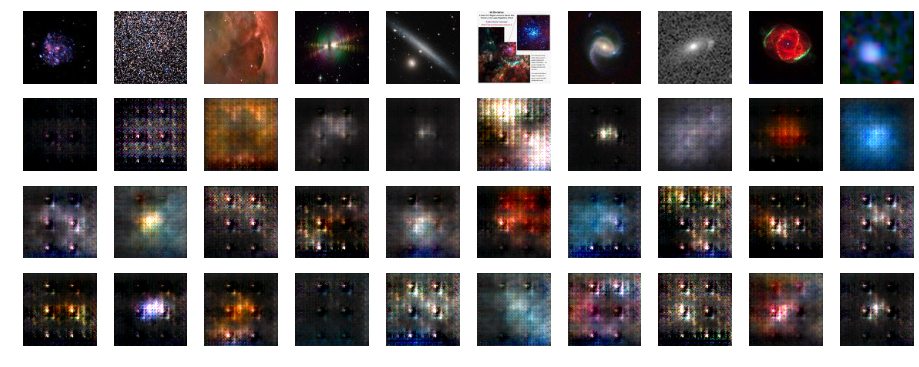

enc_loss = 0.866670072079, dec_loss = 0.147249177098 , disc_loss = 0.623069822788
gan_loss = 0.623069822788, sim_loss = 0.770318984985, kl_loss = 0.0963511690497
time: 47.774298


epoch: 4
|######----| 29/42  69% [elapsed: 00:30 left: 00:13,  0.95 iters/sec]

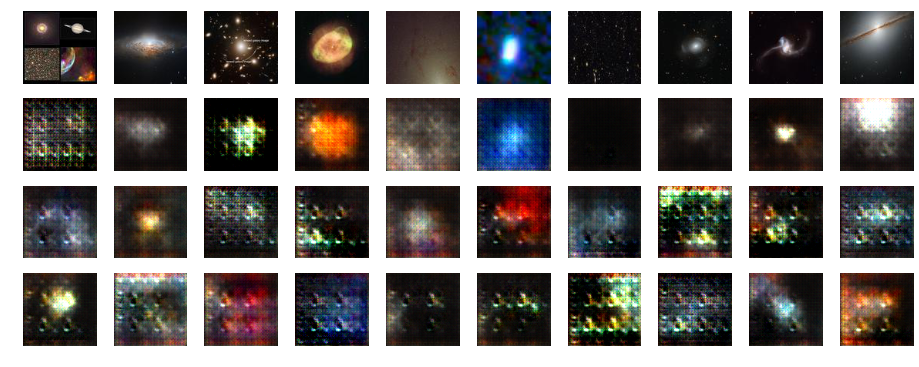

enc_loss = 0.871689677238, dec_loss = 0.151361912489 , disc_loss = 0.621198356152
gan_loss = 0.621198356152, sim_loss = 0.772560417652, kl_loss = 0.0991291999817
time: 57.416438




In [9]:
m_path = '/home/ubuntu/Data/VAEGAN_training_model/'
im_path = '/home/ubuntu/Data/VAEGAN_training_images/'
vg.fit(x_all, save_freq=2, pic_freq=30, n_epochs=4, model_path = m_path, img_path=im_path, mirroring=True)

## Saving Your Model

In addition to saving state at given training frequencies, you can also save your model by calling the `save` method at any point.

In [10]:
vg.save('/home/ubuntu/Data/VAEGAN_models/', 'test')

## Loading a Previous State
It'll then be rather simple to recall the former model state and use it to encode/generate images using the trained model.

In [11]:
loader ={}
loader['enc'] = '/home/ubuntu/Data/VAEGAN_models/test_enc.h5'
loader['dec'] = '/home/ubuntu/Data/VAEGAN_models/test_dec.h5'
loader['disc'] = '/home/ubuntu/Data/VAEGAN_models/test_disc.h5'
loader['enc_opt'] = '/home/ubuntu/Data/VAEGAN_models/test_enc_opt.h5'
loader['dec_opt'] = '/home/ubuntu/Data/VAEGAN_models/test_dec_opt.h5'
loader['disc_opt'] = '/home/ubuntu/Data/VAEGAN_models/test_disc_opt.h5'
loader['meta'] = '/home/ubuntu/Data/VAEGAN_models/test_meta.json'
vg2 = VAEGAN.load(**loader)

## Generating Images

Now we can use the previously trained model state to generate images from random normally distributed latent data using the `inverse_transform` method.

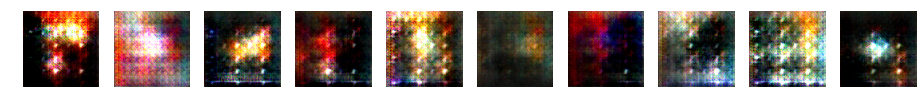

In [14]:
import numpy as np
shape = 10, vg2.latent_width
random_data = np.random.standard_normal(shape).astype('f')*3.
images = vg2.inverse_transform(random_data, test=True)
plt.figure(figsize=(16,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()

## Conclusion

This is just a short introduction but the code is fairly heavily documented with docstrings, so feel free to call the `?` operator within iPython and it should help to understand each method and attribute more fully. I hope you enjoy it.